## Heart Attack Analysis
**Introduction**

 A heart attack occurs when an artery supplying your heart with blood and oxygen becomes blocked. A blood clot can form and block your arteries, causing a heart attack. This Heart Attack Analysis helps to understand the chance of attack occurrence in persons based on varied health conditions.

**Dataset**

The dataset is Heart_Attack_Analysis_Data.csv. It has been uploaded to canvas. 
This dataset contains data about some hundreds of patients mentioning Age, Sex, Exercise Include Angia(1=YES, 0=NO), Chest Pain Type(Value 1: typical angina, Value2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), ECG Results, Blood Pressure, Cholesterol, Blood Sugar, Family History (Number of persons affected in the family), Maximum Heart Rate, Target -0=LESS CHANCE , 1= MORE CHANCE

**Copyright @Prasad-chavan1**

#### Dataset
Please change file location if required.

In [1]:
#load dataframe from csv
datafile = "CSV FILE LINK"

#load data from csv (github)
data_github = "https://raw.githubusercontent.com/prasad-chavan1/Hacktoberfest-Machine-Learning-diseases/main/Add%20Python%20Code/Heart_Attack_Analysis_Data.csv"

### model build and evaluate implemenation 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, precision_recall_fscore_support
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.linear_model import SGDClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.pyplot import figure


import warnings
warnings.filterwarnings('ignore')

class HeartAttackAnalysis:

    # -------------------------------
    # init all classifier and data
    # -------------------------------
    def __init__(self, filename) -> None:
        self.names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "SGDClassifier" , "LogisticRegression"]

        # List of classifiers used building model.
        self.classifiers = [
            KNeighborsClassifier(5),
            SVC(kernel="linear", C=0.025),
            SVC(gamma=2, C=1),
            GaussianProcessClassifier(1.0 * RBF(1.0)),
            DecisionTreeClassifier(max_depth=20),
            RandomForestClassifier(max_depth=5, n_estimators=10),
            MLPClassifier(alpha=1, max_iter=1000),
            AdaBoostClassifier(),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            SGDClassifier(),
            LogisticRegression()]

        # List of classifiers used building model.
        self.classifiers_kfold = [
            KNeighborsClassifier(5),
            SVC(kernel="linear", C=0.025),
            SVC(gamma=2, C=1),
            GaussianProcessClassifier(1.0 * RBF(1.0)),
            DecisionTreeClassifier(max_depth=20),
            RandomForestClassifier(max_depth=5, n_estimators=10),
            MLPClassifier(alpha=1, max_iter=1000),
            AdaBoostClassifier(),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            SGDClassifier(),
            LogisticRegression()]

        self.df = pd.read_csv(filename, dtype=np.float64)
        
        # Keep orignal data for backup
        self.df_org = self.df.copy()
        
        # Tranform categorical data
        self.df["CP_Type"] = pd.Categorical(self.df["CP_Type"],categories=[0,1,2,3])
        self.df["Sex"] = pd.Categorical(self.df["Sex"],categories=[0,1])
        self.df["BloodSugar"] = pd.Categorical(self.df["BloodSugar"],categories=[0,1])
        self.df["ECG"] = pd.Categorical(self.df["ECG"],categories=[0,1,2])
        self.df["ExerciseAngia"] = pd.Categorical(self.df["ExerciseAngia"],categories=[0,1])
        self.df["Target"] = pd.Categorical(self.df["Target"],categories=[0,1])
        
        pass

    # -------------------------------
    # Outlier replacement
    # -------------------------------
    def ReplaceOutlierWithMean(self, df, col):
        
        mean = df[col].mean()
        zscore = np.abs(stats.zscore(self.df_norm[col]))
        df[col] = np.where((zscore<3),df[col], mean)
        
        return df
    
    # -------------------------------
    # Preprocess all dataset
    # -------------------------------
    def PreProcess(self):
      
        self.df_norm = self.df.copy()
        
        # columns required Normalization
        col_names = ['Age', 'BloodPressure', 'Cholestrol', 'MaxHeartRate', "FamilyHistory"]
        
        # Remove Outlier
        for c in col_names:
            self.df_norm = self.ReplaceOutlierWithMean(self.df_norm, c)
        
        # Normalization using zscore.
        features = self.df_norm[col_names]
        scaler = StandardScaler().fit(features.values)
        features = scaler.transform(features.values)
        self.df_norm[col_names] = features
        
        # PCA
        pca = PCA(n_components=2)
        
        self.X_train, self.X_test, self.y_train, self.y_test = self.SampleData()
        
        self.X_train_pca = pca.fit_transform(self.X_train)
        self.X_test_pca = pca.transform(self.X_test)
        
        
    # -------------------------------
    # Random test train data split
    # -------------------------------
    def SampleData(self):
        x = self.df_norm.drop(['Target'], axis=1)
        y = self.df_norm['Target']
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=130788)
        return X_train, X_test, y_train, y_test
    
    
    # -----------------------------------------------------
    # Build and evaluate model using random test train slit.
    # ----------------------------------------------------
    def Run(self):

        log_cols=["Classifier", "Accuracy", "Prediction", "Recall", "F-Score"]
        self.log = pd.DataFrame(columns=log_cols)
        
        fig= plt.figure(figsize=(20,20))
        
        index = 0
        for clf in self.classifiers:
            
            # Train
            model = clf.fit(self.X_train_pca, self.y_train)
            name = self.names[index]

            y_score_1 =None
            b = False
            if hasattr(model, 'decision_function') : 
                y_score_1 = model.decision_function(self.X_train_pca)
                b = True
            
            # Test
            train_predictions = clf.predict(self.X_test_pca)

            # evaluate score
            acc = accuracy_score(self.y_test, train_predictions)
            prf = precision_recall_fscore_support(self.y_test, train_predictions, average="binary")

            log_entry = pd.DataFrame([[name, acc*100, prf[0]*100, prf[1]*100,prf[2]*100]], columns=log_cols)
            self.log = self.log.append(log_entry)
            
            # Pot decision region
            self.plot_decision_region(clf, index, name)
            
            index += 1
        
        plt.show()
        pass

    # -------------------------------
    # Build and evaluate model and cross validate using kFold
    # -------------------------------
    def BuildEvaluateUsingKFold(self):
        
        X = self.df_norm.drop(['Target'], axis=1)
        y = self.df_norm['Target']
        
        pca = PCA(n_components=2)
        
        X_pca = pca.fit_transform(X)
        
        fig= plt.figure(figsize=(20,20))
        
        index = 0
        splits = 5 
        kf = StratifiedKFold(n_splits=splits, random_state=1, shuffle=False) 
        for clf in self.classifiers_kfold:
            
            mae_train = []
            mae_test = []
            for train_index, test_index in kf.split(X_pca, y):
                X_train, X_test = X_pca[train_index], X_pca[test_index]
                y_train, y_test = y[train_index], y[test_index]   
                
                clf.fit(X_train, y_train)
                
                y_train_pred = clf.predict(X_train)
                y_test_pred = clf.predict(X_test)
                mae_train.append(mean_absolute_error(y_train, y_train_pred))
                mae_test.append(mean_absolute_error(y_test, y_test_pred))
            
            self.plot_graph_kfold(mae_train, mae_test, index, self.names[index], splits)
            index += 1
        
        plt.show()

    # -------------------------------
    # Plot graph for kfold
    # -------------------------------
    def plot_graph_kfold(self, mae_train, mae_test, index, name, splits):
        folds = range(1, splits + 1)
        
        g = plt.subplot2grid((4,4), (int(index/4),int(index%4)))
        
        g.plot(folds, mae_train, 'o-', color='green', label='train')
        g.plot(folds, mae_test, 'o-', color='red', label='test')
        g.legend()
        #g.grid()
        g.set_xlabel('Number of fold')
        g.set_ylabel('Mean Absolute Error')
        g.set_title(name)

            
    # -------------------------------
    # Plot graph decision region
    # -------------------------------
    def plot_decision_region(self, clf, index, name):
        self.plot_decision_regions(self.X_train_pca, self.y_train, clf, index = index, name=name)
    
    # -------------------------------
    # Plot graph decision region
    # -------------------------------
    def plot_decision_regions(self, X, y, classifier, resolution=0.20, index = 1, name=""):
        # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        
        g = plt.subplot2grid((4,4), (int(index/4),int(index%4)))
        g.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
        g.set_xlim(xx1.min(), xx1.max())
        g.set_ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            g.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.6, 
                        c=[cmap(idx)],
                        edgecolor='black',
                        marker=markers[idx], 
                        label=cl)# plot decision regions for training set
        
        g.set_title(name)

In [3]:
ha = None
try:
    ha = HeartAttackAnalysis(datafile)
except:
    ha = HeartAttackAnalysis(data_github)

## Data set statistics

In [4]:
ha.df.describe()

,Age,BloodPressure,Cholestrol,MaxHeartRate,FamilyHistory
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.204620
std,9.082101,17.538143,51.830751,22.905161,1.096825
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,5.000000


In [5]:
ha.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
Age              303 non-null float64
Sex              303 non-null category
CP_Type          303 non-null category
BloodPressure    303 non-null float64
Cholestrol       303 non-null float64
BloodSugar       303 non-null category
ECG              303 non-null category
MaxHeartRate     303 non-null float64
ExerciseAngia    303 non-null category
FamilyHistory    303 non-null float64
Target           303 non-null category
dtypes: category(6), float64(5)
memory usage: 14.4 KB


### Missing value check
- No missing/invalid values in data set.

In [6]:
ha.df.isna().sum()

Age              0
Sex              0
CP_Type          0
BloodPressure    0
Cholestrol       0
BloodSugar       0
ECG              0
MaxHeartRate     0
ExerciseAngia    0
FamilyHistory    0
Target           0
dtype: int64

### Feature correlation analysis
Identify relevant, irrelevant attributes for building model. 

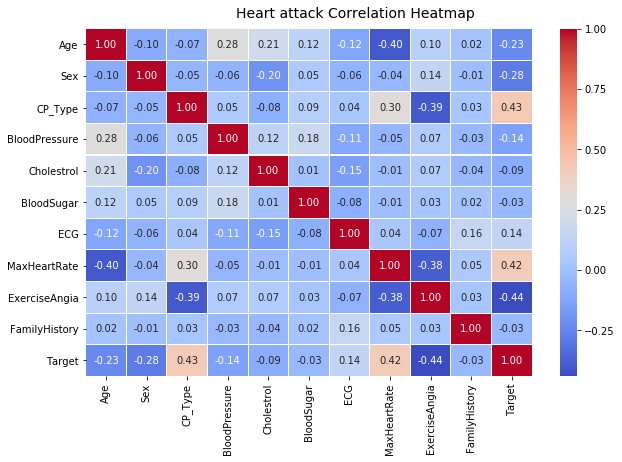

In [7]:
f, ax = plt.subplots(figsize=(10, 6))

dftmp = ha.df_org.copy()
cols = ha.df_org.columns
scaler = StandardScaler()
scaler.fit(dftmp)
dftmp[cols] = scaler.transform(dftmp)

corr = dftmp.corr(method='pearson')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart attack Correlation Heatmap', fontsize=14)

**Data distribuion and outliers observation using boxplot**

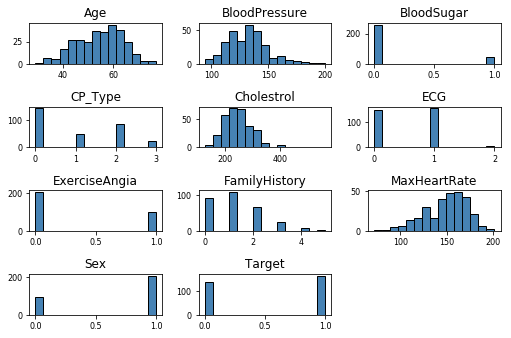

In [8]:
ha.df_org.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

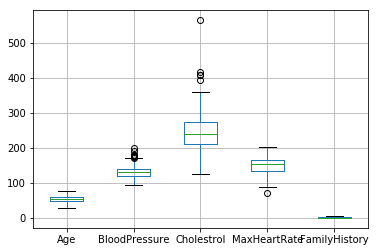

In [9]:
ha.df.boxplot()

### Preprocess data
* Replace outlier with mean
* Normalize data using zscore
* Reduce dimentions using PCA (no. of components 2)

In [10]:
ha.PreProcess()

#### Visualize data

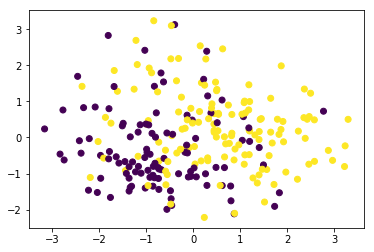

In [11]:
plt.scatter(ha.X_train_pca[:, 0], ha.X_train_pca[:, 1], c=ha.y_train)

### Build and test model 
We will build and evaluate models using following classifiers 

**Model selction method:** test train random split 

**Model accurracy metrices:** Accuracy, Prediction,	Recall,	F-Score

* Nearest Neighbors
* Linear SVM
* RBF SVM
* Gaussian Process
* Decision Tree
* Random Forest
* Neural Net
* AdaBoost
* Naive Bayes
* QDA
* LogisticRegression

Graph will show decision boundires for all classifier for trained data

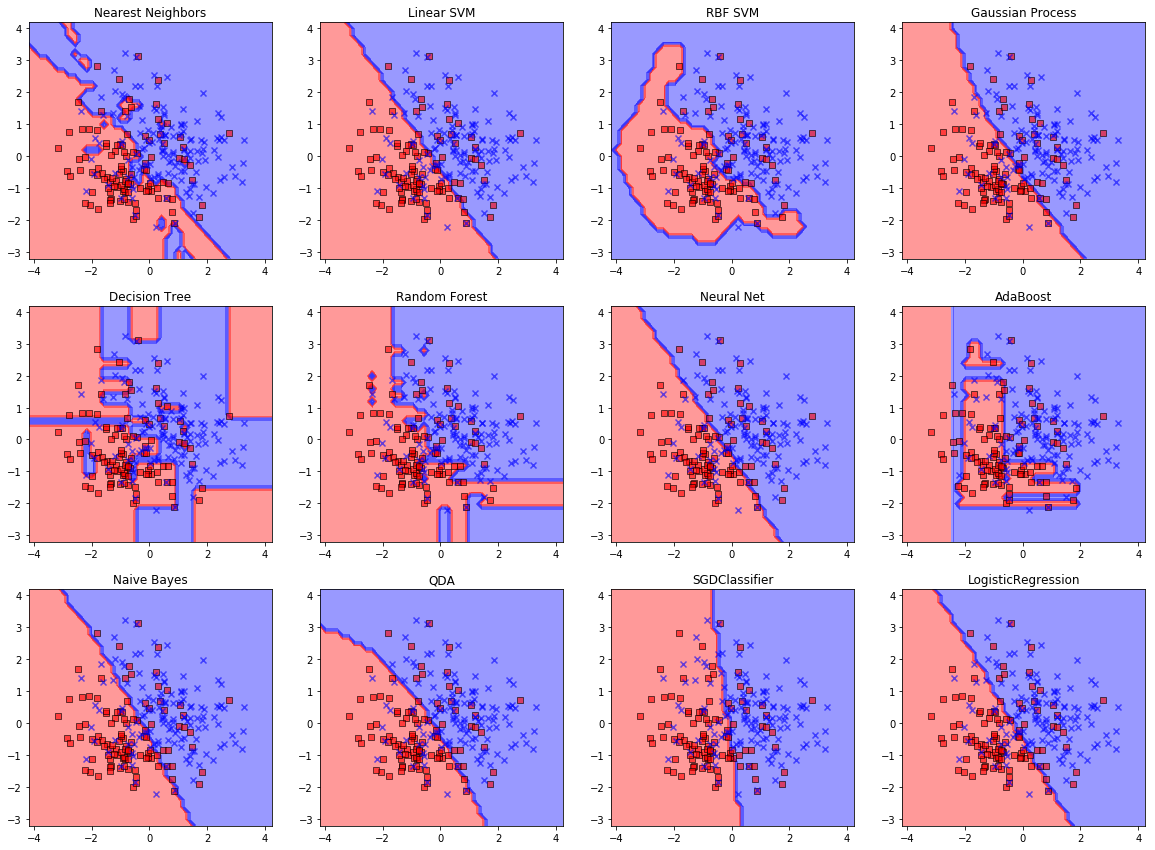

In [12]:
ha.Run()

### Model Evaluation metrics using test data

In [13]:
ha.log

,Classifier,Accuracy,Prediction,Recall,F-Score
0,Nearest Neighbors,75.409836,71.428571,83.333333,76.923077
0,Linear SVM,78.688525,77.419355,80.000000,78.688525
0,RBF SVM,77.049180,72.222222,86.666667,78.787879
0,Gaussian Process,80.327869,78.125000,83.333333,80.645161
0,Decision Tree,62.295082,60.606061,66.666667,63.492063
0,Random Forest,77.049180,72.222222,86.666667,78.787879
0,Neural Net,78.688525,77.419355,80.000000,78.688525
0,AdaBoost,68.852459,64.864865,80.000000,71.641791
0,Naive Bayes,78.688525,75.757576,83.333333,79.365079
0,QDA,78.688525,77.419355,80.000000,78.688525


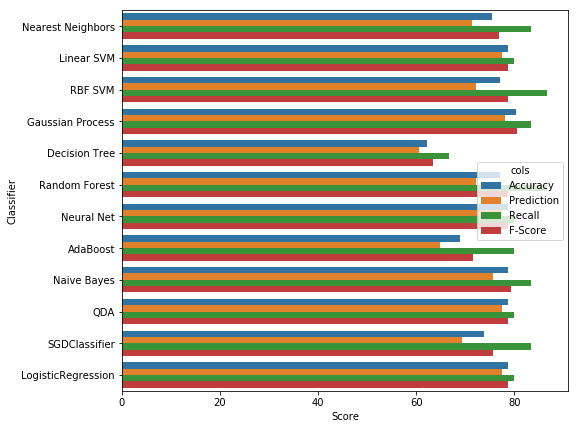

In [14]:
ig= plt.figure(figsize=(8,7))
tmpdf = ha.log.melt('Classifier', var_name='cols', value_name='vals')
g = sns.barplot(y="Classifier", x="vals", hue='cols', data=tmpdf, orient = 'h')
g.set(xlabel='Score')
plt.show()

### Model cross verification using StratifiedKFold
We have used cross verfication using StratifiedKFold method for model selection.
A model thats fits the training set well but testing set poorly is said to be overfit to the training set and a model that fits both sets poorly is said to be underfit.

The strategy involves the following steps:

- split the dataset into training and test sets
- train the model with the training set
- test the model on the training and test sets
- calculate the **Mean Absolute Error (MAE)** for training and test sets
- plot and interpret results


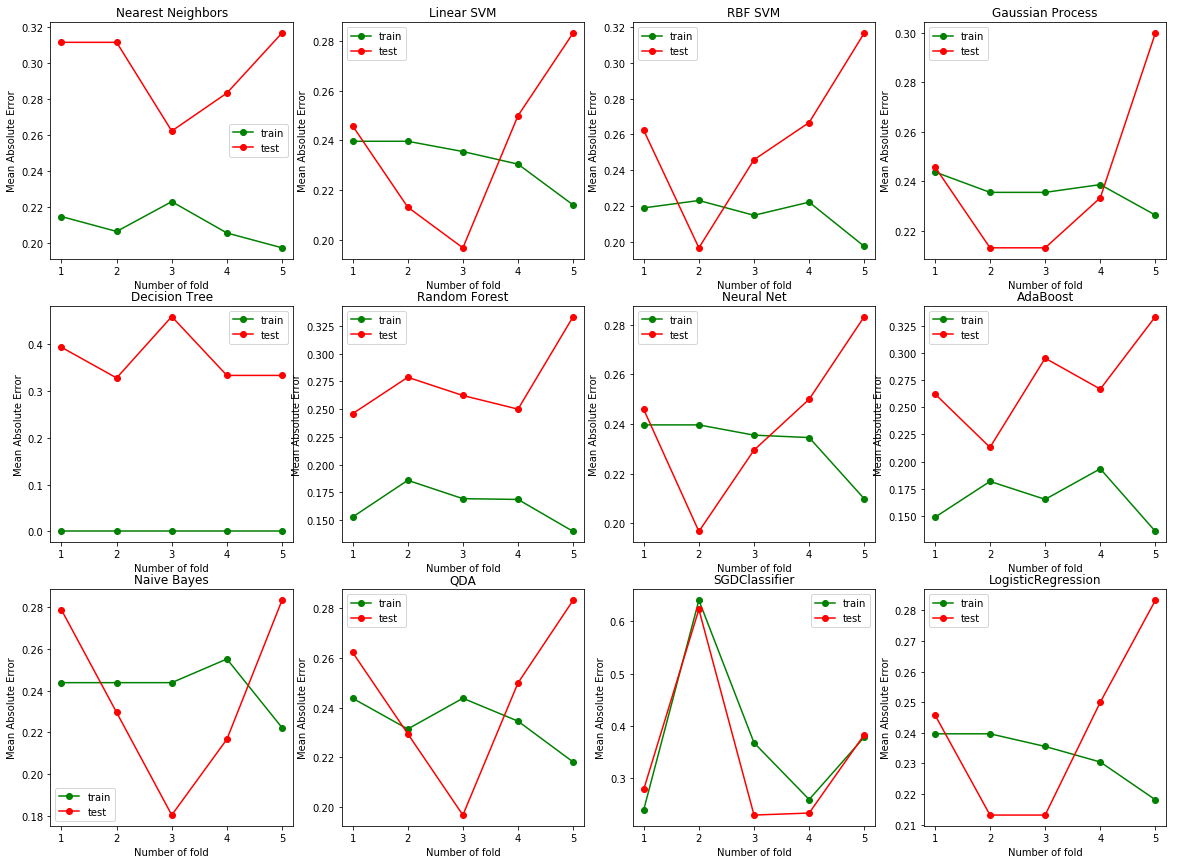

In [15]:
ha.BuildEvaluateUsingKFold()

### Mean Absolute Error (MAE) analysis

We have observed MAE point (>30) for **Nearest Neighbors, RBF SVM, Decision Tree, Random Forest, Neural Net, AdaBoost, SGDClassifier**. So the model **underfits** the some portion of the test data. 

We have observed MAE point (<20) for test and training set for  **Linear SVM, RBF SVM, Decision Tree, Random Forest, AdaBoost, Naive Bayes, QDA.** SO the model is **overfits** the some portion of data. 
         
We have observed all MAE point are between .30 and .20 for **Leaner SVM, Gaussian Process, QDA and Logistic regression.**
So model is **best fit** for all portion of test and train data.






### Conclusion
**Leaner SVM, Gaussian Process, QDA and Logistic regression.** model best fit and provides simillar accuracy, recall and f-score.
Gaussian Process provide best accuracy but mean MAE is hight than Logistic regression.

We recommend **Logistic regression** because it mean MAE is lowest in best fit model 
